# EXPERIMENTS 03
This notebook is the continuation of the previous notebook experiments_01.
It uses data resulted from the previous experiments notebook

This notebook consists of data exploration: 
- skeweness
- pairplot 
- correlations 
- density

**Packages**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

**Change the current directory** 

In [3]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
visuals_path = "notebooks/visualizations"
data_path = "data/experiments_data"
#Change current directory
os.chdir ("../..")
#Check the current directory
os.getcwd()

'/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn'

**Loading data**

In [4]:
#Loading data 
df = pd.read_csv (f"{data_path}/2024-09-30_bcppmchurn_01_df.csv")

In [5]:
#Quick exploration
print (f"df shape: {df.shape}")
print (f"df columns : {list(df.columns)}")

df shape: (35382, 18)
df columns : ['dn', 'pivot', 'nb_1m', 'nb_2m', 'nb_3m', 'nb_4m', 'nb_5m', 'nb_6m', 'sum__1m', 'sum__2m', 'sum__3m', 'sum__4m', 'sum__5m', 'sum__6m', 'value', 'dn_group_id', 'sum_value_0_1', 'value_0_1m_1_2m']


### Feature correlations 

In [6]:
#Get numerical features
df_numerical_columns = df.dtypes[df.dtypes != "object" ].index.to_list()
#Delete column dn
df_numerical_columns = df_numerical_columns[1:]
print ("df numerical columns :", df_numerical_columns)

df numerical columns : ['nb_1m', 'nb_2m', 'nb_3m', 'nb_4m', 'nb_5m', 'nb_6m', 'sum__1m', 'sum__2m', 'sum__3m', 'sum__4m', 'sum__5m', 'sum__6m', 'dn_group_id', 'sum_value_0_1', 'value_0_1m_1_2m']


In [7]:
#Correlation matrix
correlation_matrix = df[df_numerical_columns].corr()

<Axes: >

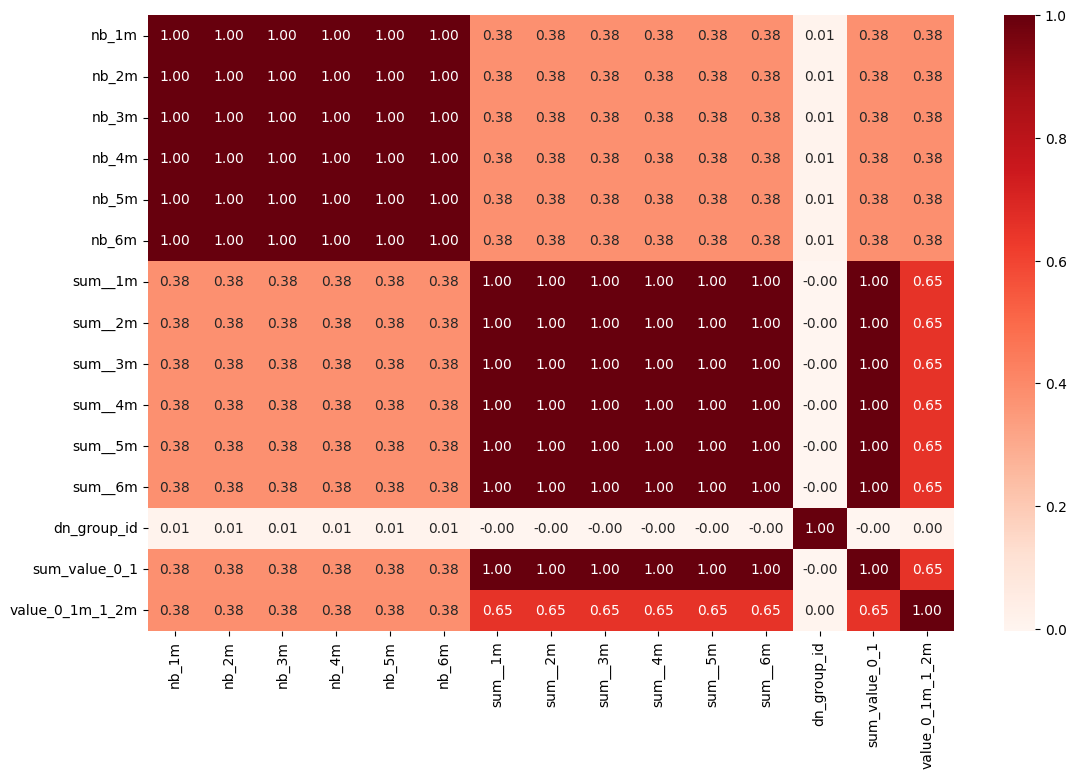

In [8]:
#Heatmap
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, cmap="Reds", annot=True, fmt= ".2f" )

- features familly nb_nm where n can be 1, ..., 6 are 100% correlated between each other
- features familly sum_nm where n can be 1, ..., 6 are 100% correlated between each other as well as with sum_value_0_1
- there is a prommissing correlation between columns familly sum_nm and column value_0_1m_1_2m

Ploting features pairplots to better understand relationships 

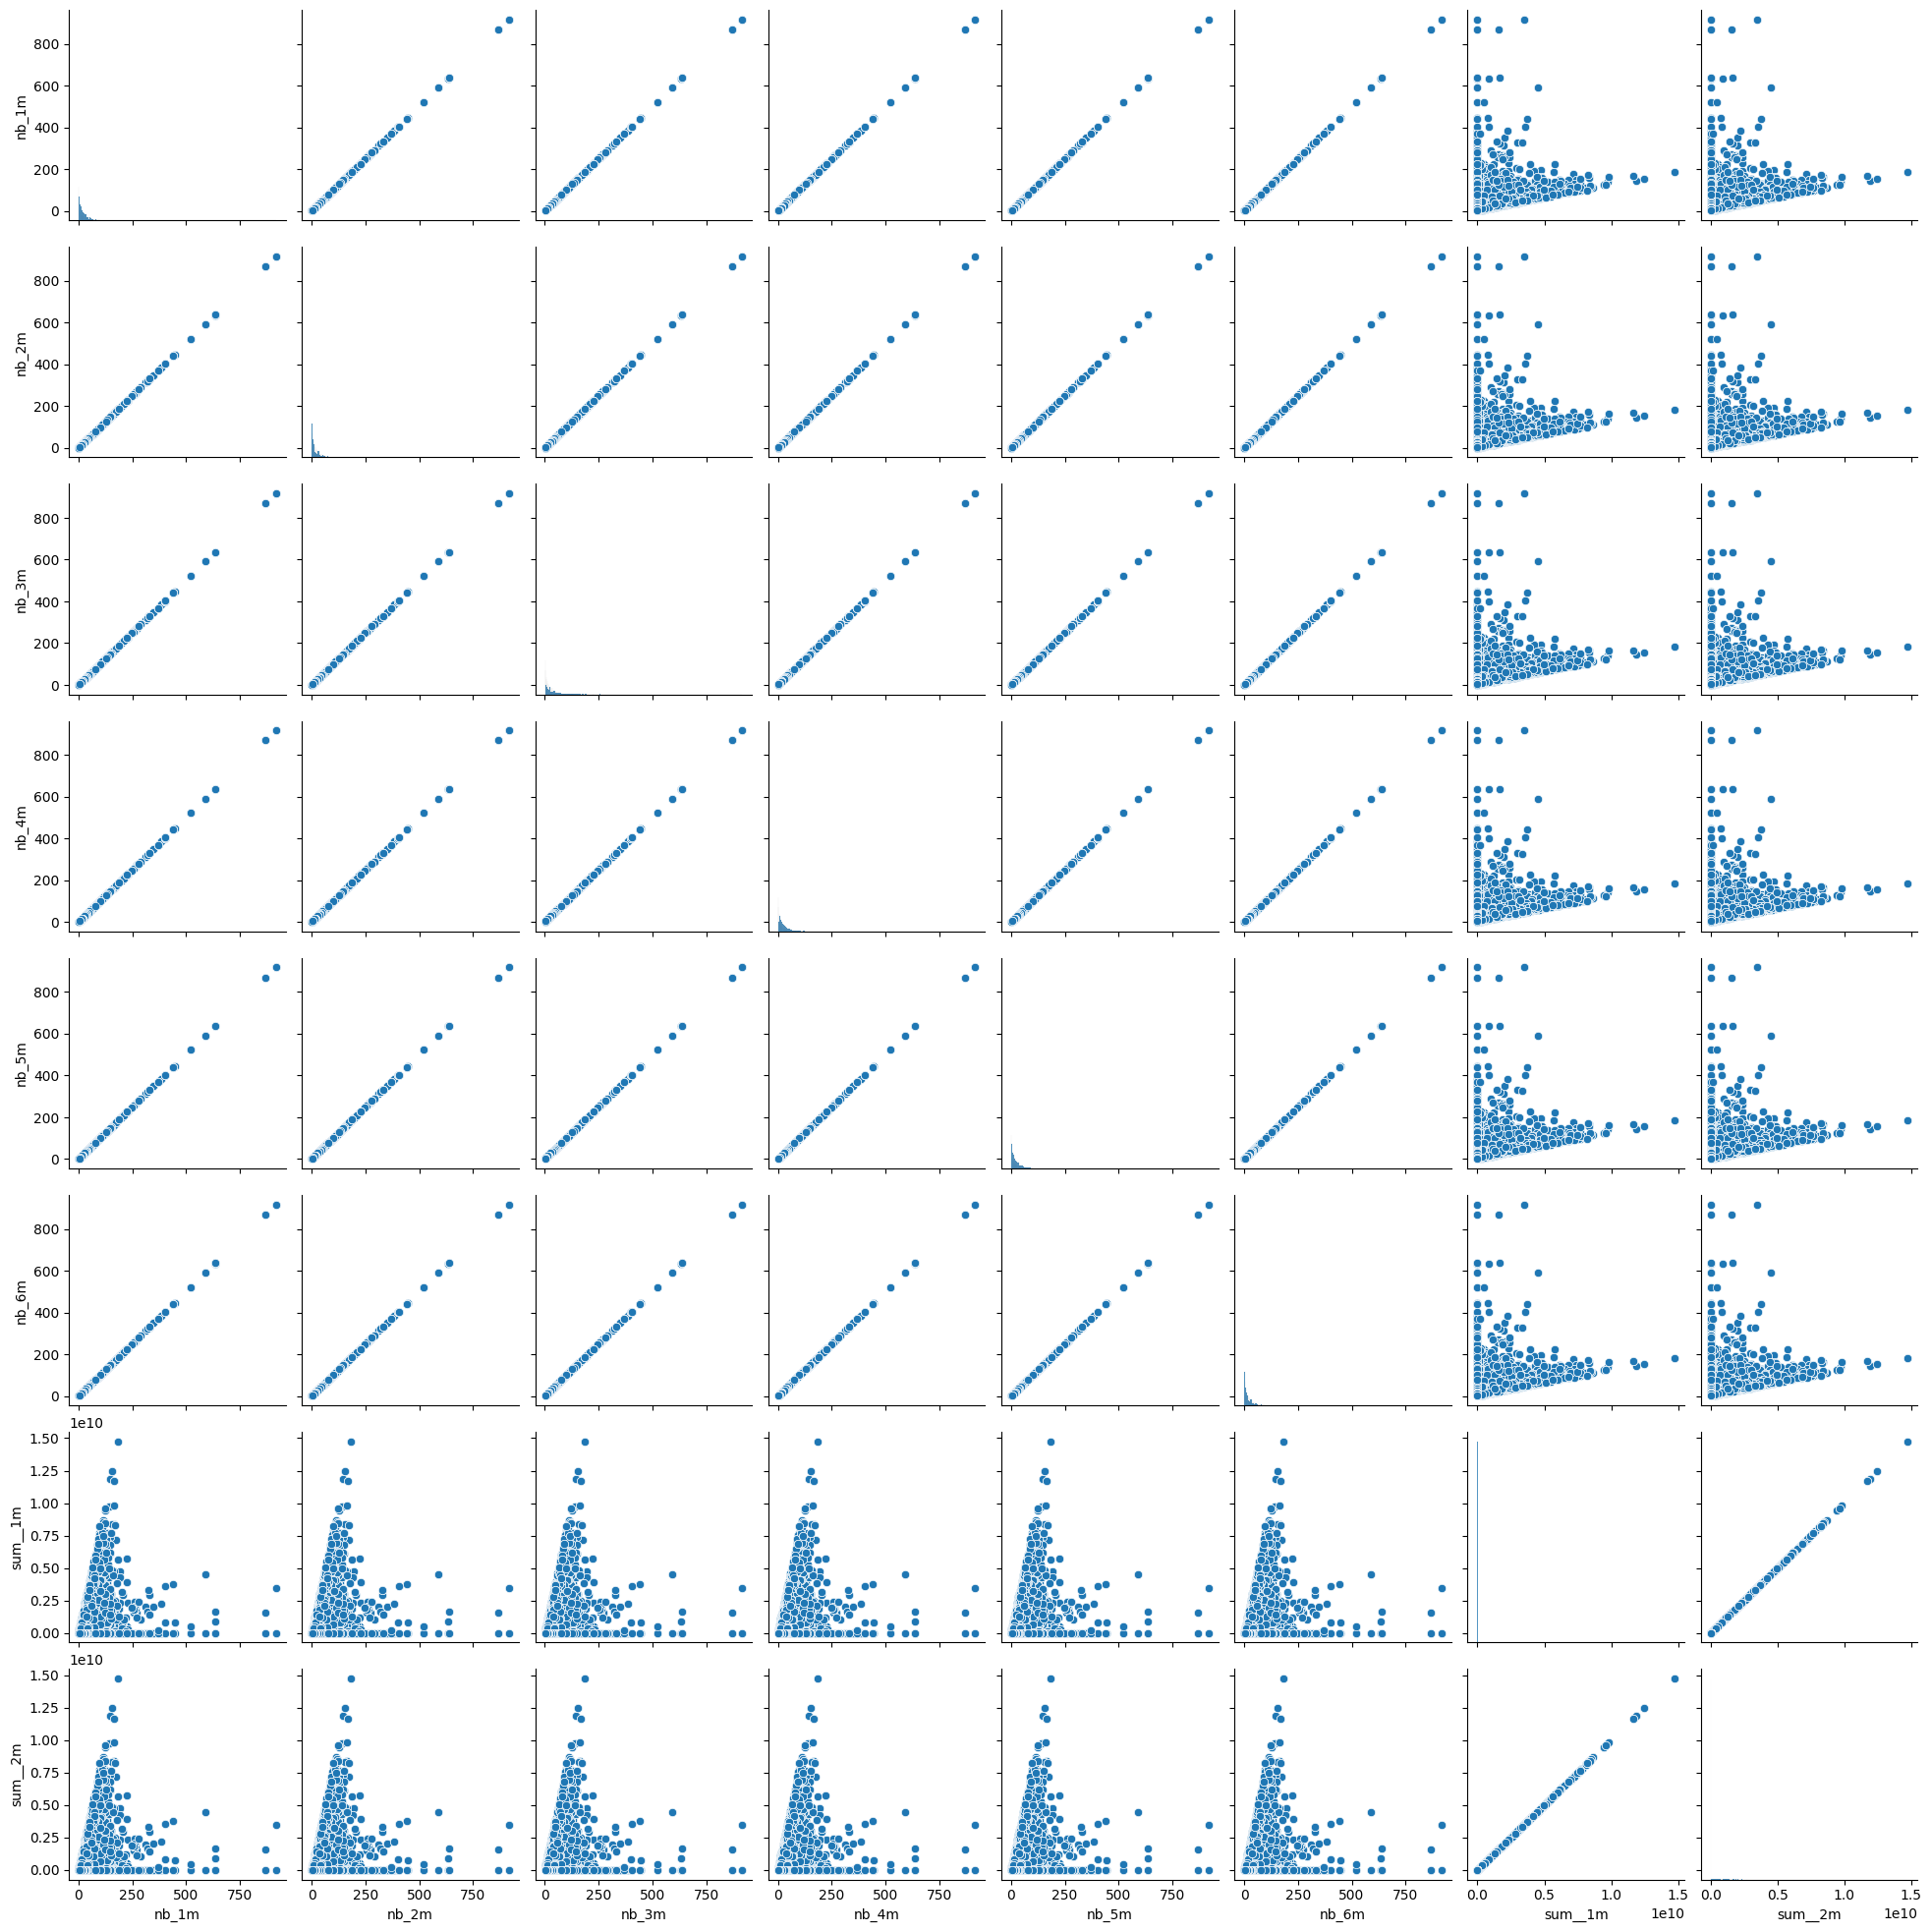

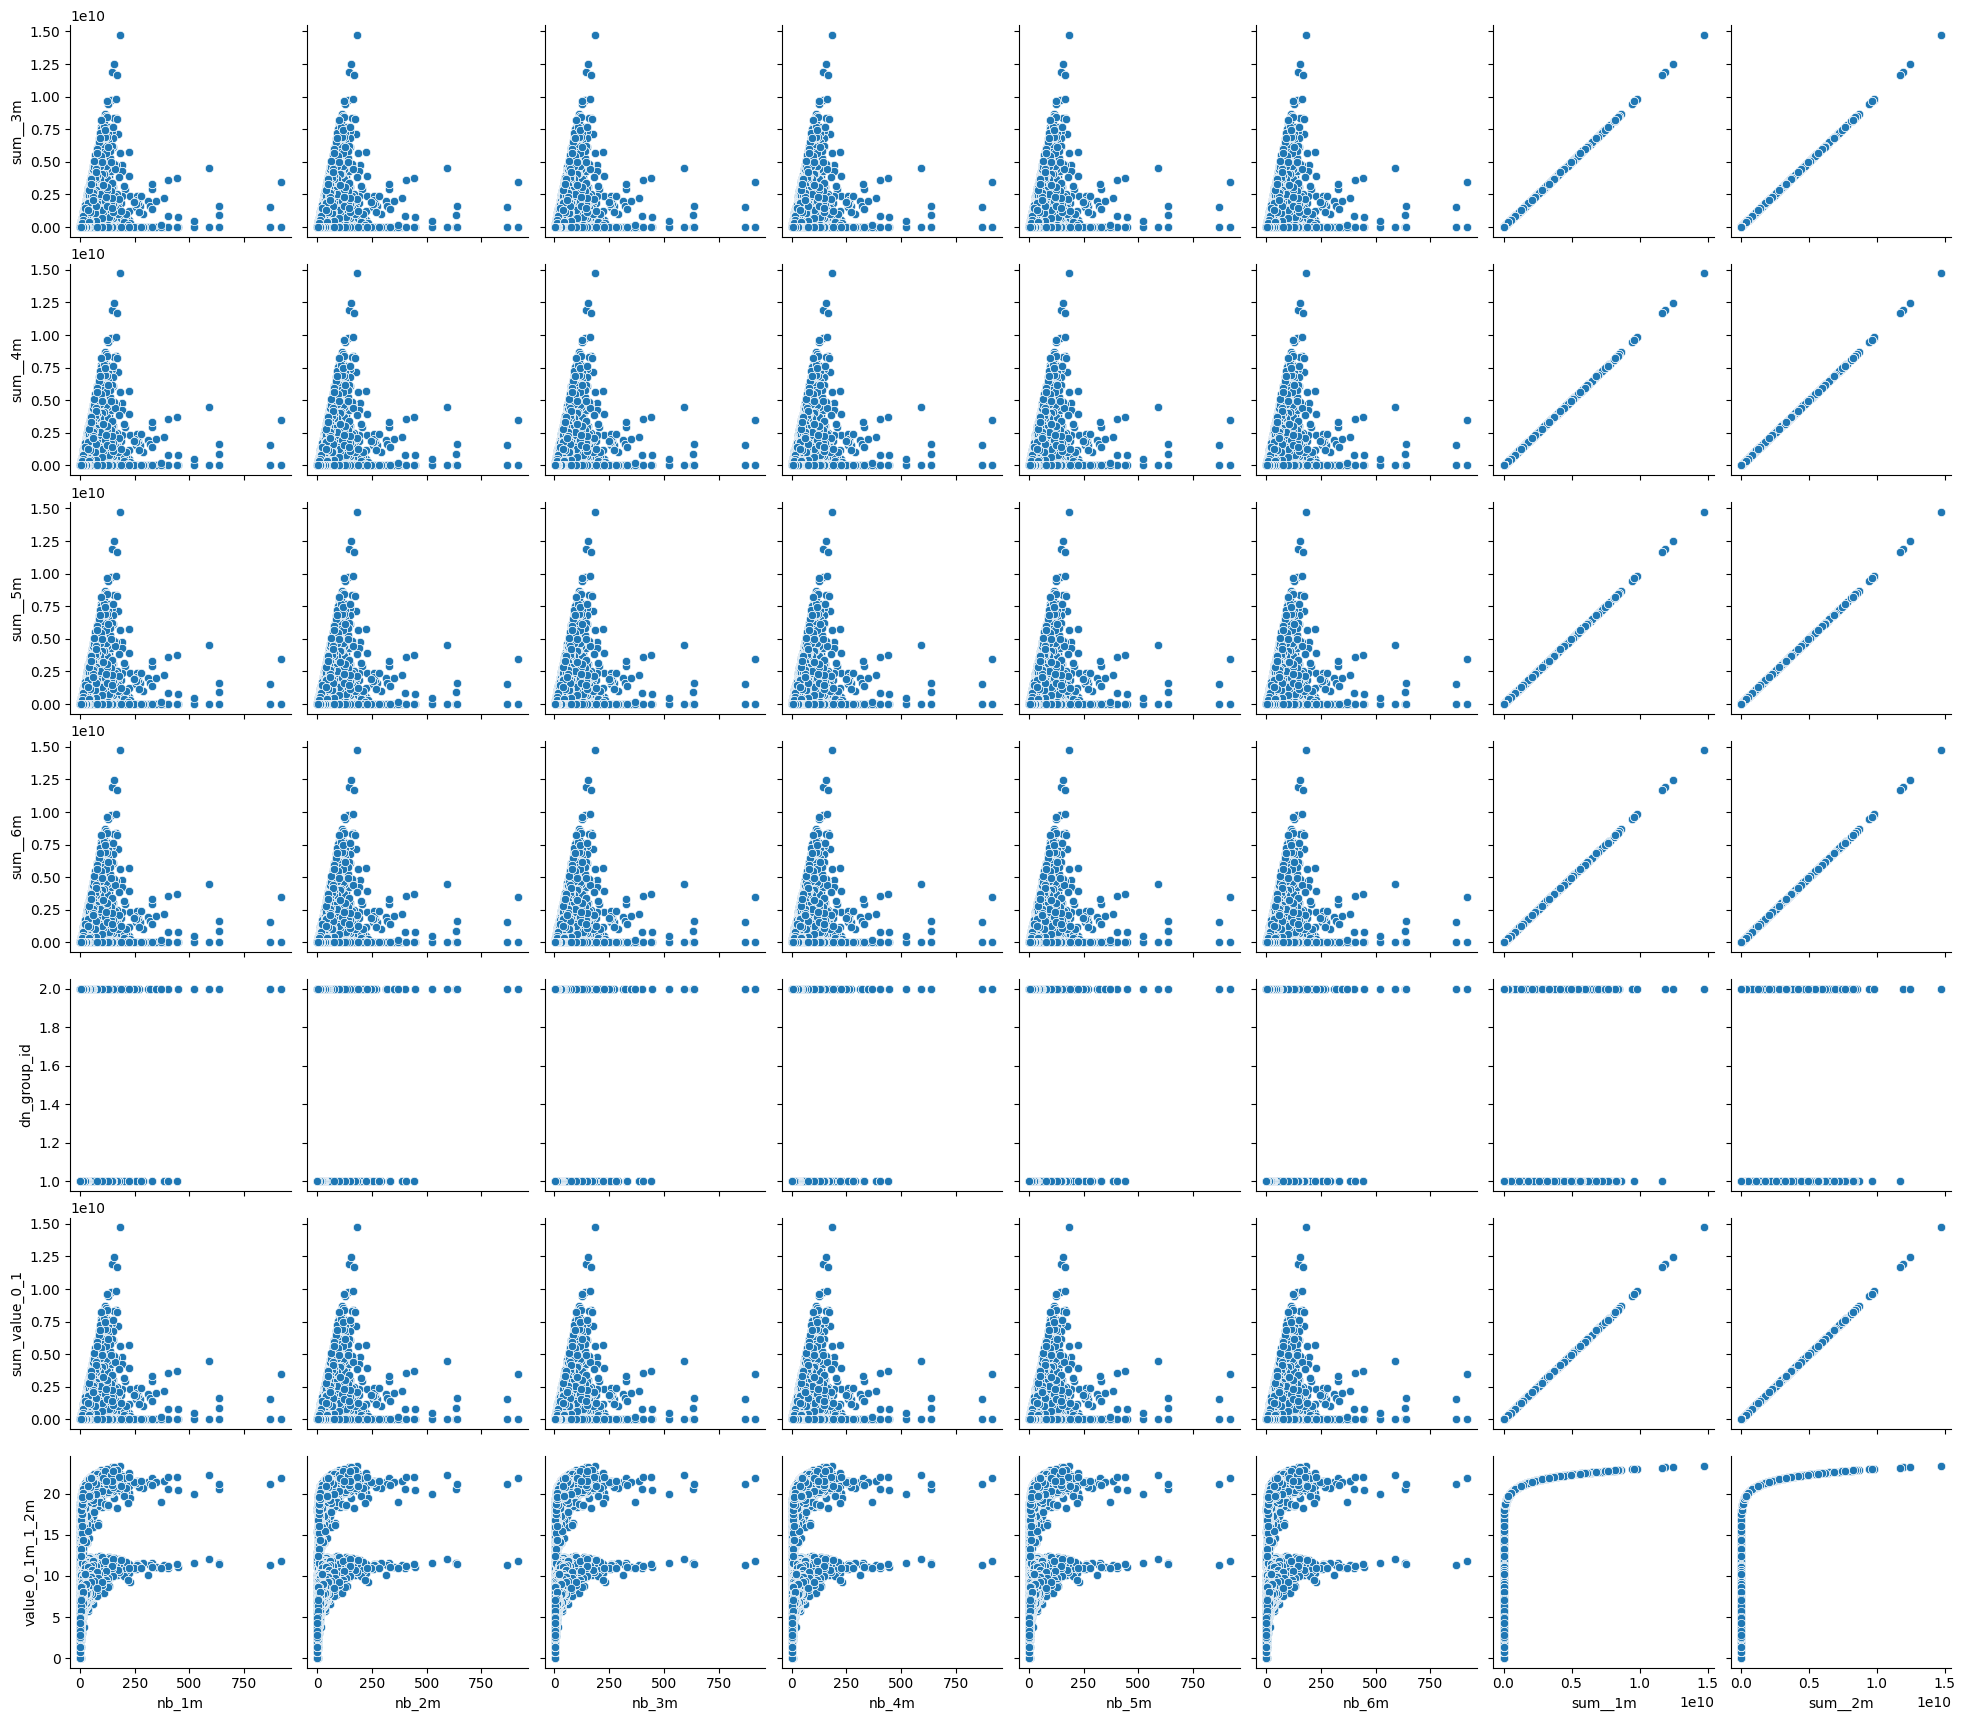

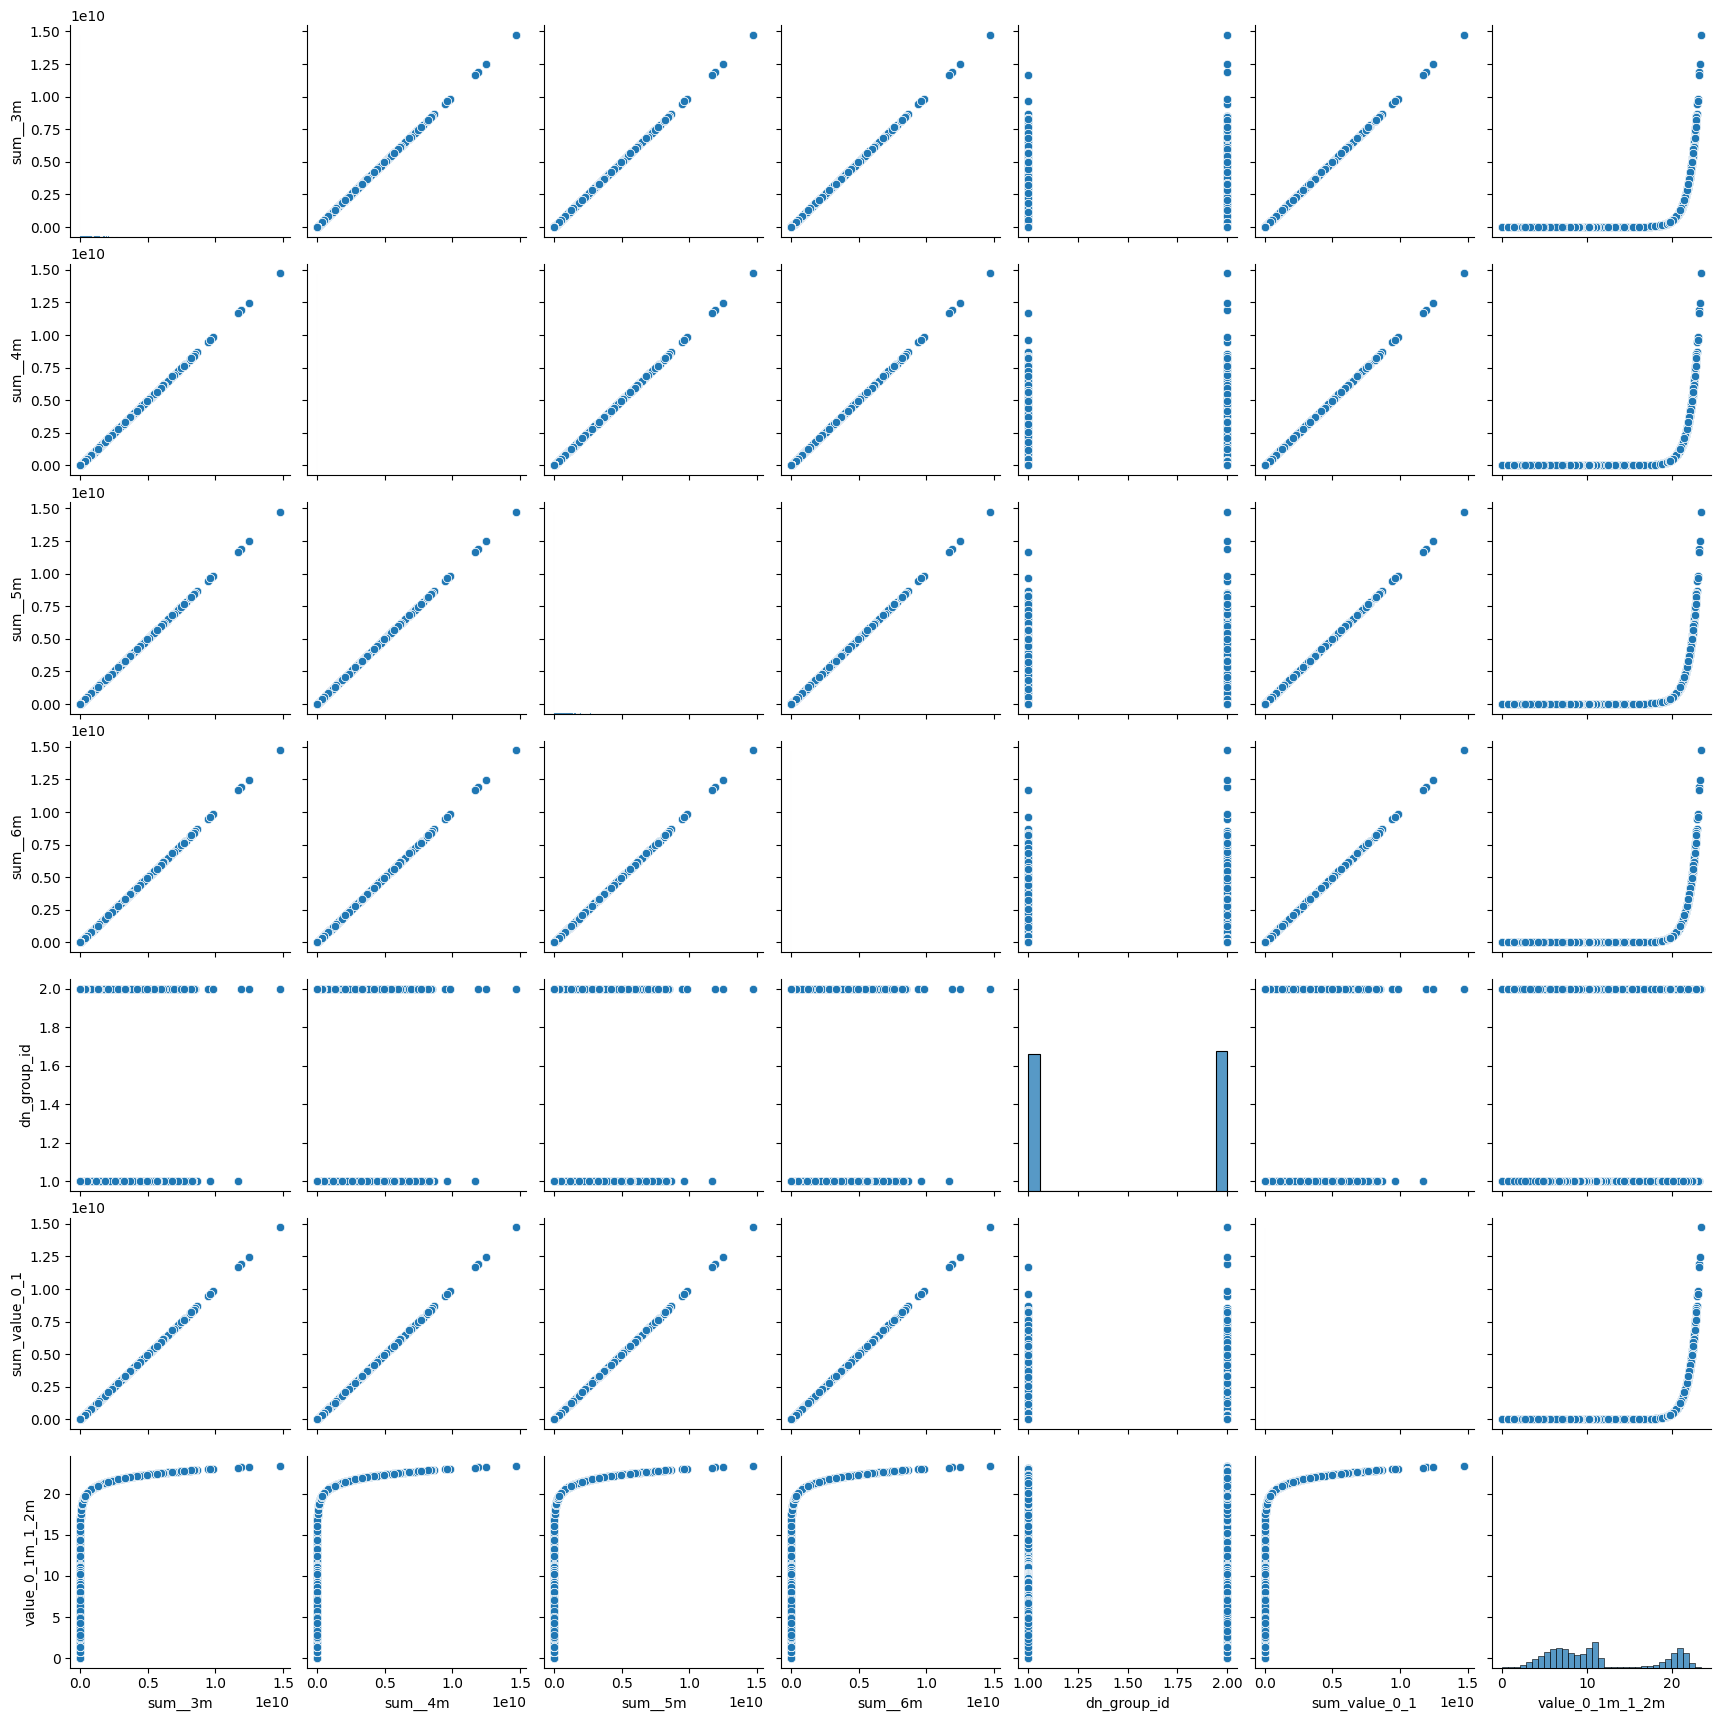

In [9]:
#Plot features pairplots
partition1 = df_numerical_columns[0:8]
partition2 = df_numerical_columns[8:]

sns.pairplot(df[df_numerical_columns], x_vars = df[partition1], y_vars= df[partition1])
sns.pairplot(df[df_numerical_columns], x_vars = df[partition1], y_vars= df[partition2])
sns.pairplot(df[df_numerical_columns], x_vars = df[partition2], y_vars= df[partition2])

Fixing a correlations thereshold and delete columns that surpass this thereshold

In [91]:
correlation_threshold = 0.95
highly_correlated_columns = []
original_columns = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # If the correlation exceeds the threshold, mark one of the columns to drop
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            origin_column = correlation_matrix.columns[i]
            col_tobe_deleted = correlation_matrix.columns[j]
            if col_tobe_deleted not in highly_correlated_columns:
                highly_correlated_columns.append(col_tobe_deleted)
            if origin_column not in original_columns and origin_column not in highly_correlated_columns :
                original_columns.append(origin_column)
    if correlation_matrix.columns[i] not in highly_correlated_columns and correlation_matrix.columns[i] not in original_columns:
        original_columns.append(correlation_matrix.columns[i])


highly_correlated_columns

['nb_2m',
 'nb_3m',
 'nb_4m',
 'nb_5m',
 'nb_6m',
 'sum__2m',
 'sum__3m',
 'sum__4m',
 'sum__5m',
 'sum__6m',
 'sum_value_0_1']